In [1]:
from osgeo import ogr, osr

In [2]:
driver = ogr.GetDriverByName('ESRI Shapefile')

In [3]:
dataset = driver.Open("/home/smitesh22/Data/GIS Extracted/N24E086_wgs84/planet_86,24_87,25-shp/shape", 0)

In [7]:
layer = dataset.GetLayer(2)

In [8]:
for feature in layer:
        attributes = feature.items()
        print(attributes)


{'osm_id': 147467755, 'name': None, 'type': 'reservoir'}
{'osm_id': 154381633, 'name': None, 'type': 'residential'}
{'osm_id': 155432667, 'name': 'Giridih', 'type': 'residential'}
{'osm_id': 155432701, 'name': None, 'type': 'railway'}
{'osm_id': 155432703, 'name': None, 'type': 'quarry'}
{'osm_id': 155432704, 'name': None, 'type': 'industrial'}
{'osm_id': 155432705, 'name': 'Konar Coal Mine', 'type': 'quarry'}
{'osm_id': 155432718, 'name': None, 'type': 'residential'}
{'osm_id': 174064496, 'name': None, 'type': 'railway'}
{'osm_id': 178122078, 'name': None, 'type': 'railway'}
{'osm_id': 178122080, 'name': None, 'type': 'industrial'}
{'osm_id': 388879118, 'name': None, 'type': 'residential'}
{'osm_id': 388879120, 'name': None, 'type': 'residential'}
{'osm_id': 397957661, 'name': None, 'type': 'railway'}
{'osm_id': 397969033, 'name': None, 'type': 'residential'}
{'osm_id': 397969036, 'name': None, 'type': 'farmland'}
{'osm_id': 397969040, 'name': None, 'type': 'farmland'}
{'osm_id': 3979

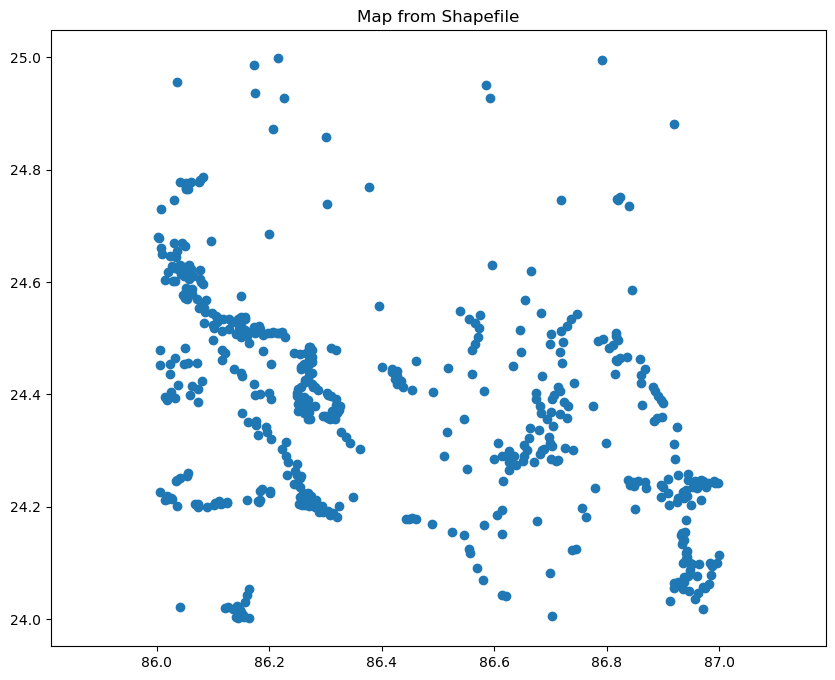

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile into a GeoDataFrame
shapefile_path = "/home/smitesh22/Data/GIS Extracted/N24E086_wgs84/planet_86,24_87,25-shp/shape"
gdf = gpd.read_file(shapefile_path)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax)
plt.title("Map from Shapefile")
plt.axis("equal")  # To ensure the aspect ratio is correct
plt.show()


In [11]:
print(gdf)

         osm_id        name     type  population                   geometry
0     245718848     Pirtanr  village         NaN  POINT (86.16411 24.05362)
1     245719668       Karon  village         NaN  POINT (86.74510 24.12508)
2     245719844       Sarsa  village         NaN  POINT (86.93403 24.15447)
3     245720167     Giridih     city    114500.0  POINT (86.30872 24.18626)
4     245720785    Bengabad  village         NaN  POINT (86.36169 24.30374)
..          ...         ...      ...         ...                        ...
543  1711330898    Pahārpur   hamlet         NaN  POINT (86.61395 24.29132)
544  1711330899     Sābejor   hamlet         NaN  POINT (86.59968 24.28558)
545  1711330900     Sābejor   suburb         NaN  POINT (86.62600 24.26511)
546  1711330901  Bawāndīgha   suburb         NaN  POINT (86.62677 24.27941)
547  1722990985     Jasidih     town         NaN  POINT (86.64575 24.51379)

[548 rows x 5 columns]


In [12]:
layer_names = gdf["type"].unique()
